**JUEGO FROZEN LAKE**


EL JUGADOR INICIA EN UNA POSICIÓN DESEAMOS QUE LLEGUE A LA META SIN CAER EN UNO DE LOS HOYOS

Descipción:
FrozenLake es un juego de ejemplo comúnmente utilizado en el contexto del aprendizaje por refuerzo y, en particular, en la implementación y prueba de algoritmos de aprendizaje por refuerzo como Q-learning. El juego FrozenLake se implementa como un entorno de cuadrícula 4x4 en el cual un agente (representado por un jugador) debe navegar desde el punto de inicio hacia un objetivo evitando caer en un agujero de hielo.


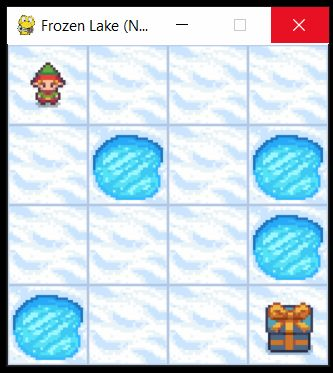

In [1]:
import numpy as np
import gym
import random

In [2]:

# entorno determinista, movimientos del agente serán predecibles.
env = gym.make('FrozenLake-v1', is_slippery = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
#posibles acciones
#0: IZQUIERDA
#1: ABAJO
#2: DERECHA
#3: ARRIBA


In [4]:
#tabla de estados

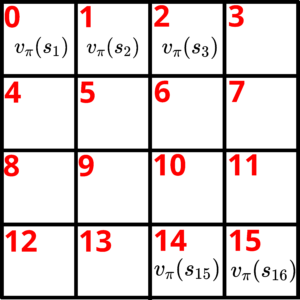         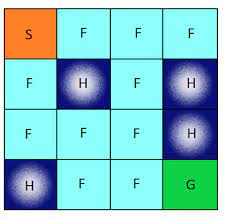

In [5]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

qtable = np.zeros((state_space_size, action_space_size))


qtable


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
#Definimos parametros

total_episodes = 10000
gamma = 0.99 #FACTOR DE DESCUENTO
alpha = 0.2 #TAZA DE APRENDIZAJE
max_pasos = 100 #bucle
epsilon = 1 # La tasa de exploración(controla y equilibra)
max_epsilon = 1
min_epsilon = 0.01
#reducir la probabilidad de exploración.
taza_decaimiento = 0.001

In [7]:

rewards = []
for episode in range(total_episodes):
    state = env.reset()
    step = 0
    #Inicializa indicador de finalización  a False.
    done = False
    total_rewards = 0
    sequence = []
    for step in range(max_pasos):
       #controla la probabilidad de exploración frente a explotación.
        if random.uniform(0,1) > epsilon:
          # explotar
            action = np.argmax(qtable[state,:])
        else:
          #explorar, elige una acción aleatoria del espacio de acciones del entorno.
            action = env.action_space.sample()

        sequence.append(action)

        #Ejecuta la acción seleccionada
        new_state, reward, done, info = env.step(action)

        max_new_state = np.max(qtable[new_state,:])
        #Actualiza el valor Q
        #se utiliza para mejorar gradualmente las estimaciones de los valores Q
        qtable[state,action] = qtable[state,action] + alpha*(reward+gamma*max_new_state-qtable[state,action])
        total_rewards += reward
        state = new_state
        if done:
            break
     #Actualiza con la función de decaimiento exponencial.
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-taza_decaimiento*episode)
    rewards.append(total_rewards)

print("Puntaje promedio:", str(sum(rewards)/total_episodes))

print("Puntaje del último episodio:", total_rewards)

print(f"Sequence = {sequence}")



Puntaje promedio: 0.8767
Puntaje del último episodio: 1.0
Sequence = [1, 1, 2, 1, 2, 2]


In [8]:
print(qtable)

[[0.94148015 0.95099005 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.93507994]
 [0.84623715 0.970299   0.44530369 0.69938055]
 [0.74679773 0.         0.0982582  0.08744195]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.91123932]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.96973019 0.99       0.         0.96992465]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


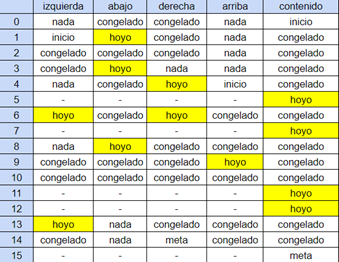   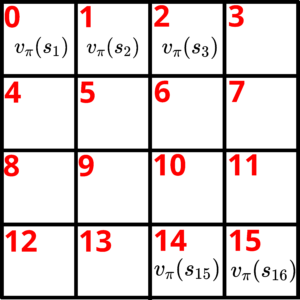

In [9]:
#ya teniendo nuestro modelo entrenado
env.reset()
for episode in range(5):
    state = env.reset()
    step = 0
    total_rewards = 0
    done = False
    print("Episode:", episode+1)

    for step in range(max_pasos):

        action = np.argmax(qtable[state,:])
        new_state, reward, done, info = env.step(action)

        if done:
            print("Numero de pasos:", step)
            print(f"Sequence = {sequence}")

            break
        state = new_state

env.close()


Episode: 1
Numero de pasos: 5
Sequence = [1, 1, 2, 1, 2, 2]
Episode: 2
Numero de pasos: 5
Sequence = [1, 1, 2, 1, 2, 2]
Episode: 3
Numero de pasos: 5
Sequence = [1, 1, 2, 1, 2, 2]
Episode: 4
Numero de pasos: 5
Sequence = [1, 1, 2, 1, 2, 2]
Episode: 5
Numero de pasos: 5
Sequence = [1, 1, 2, 1, 2, 2]


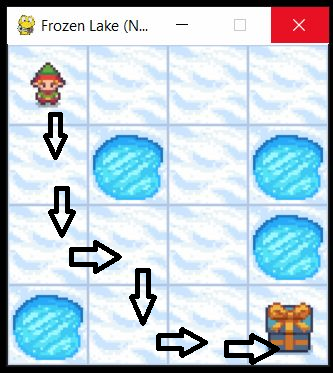